In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# organ = "liver"
# organ = "heart"
# organ = "muscle"
organ = "kidney"

Load data
===

In [3]:
path= '../data/alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    

print(data.shape)
data=data[data.NDP >=4]

data=data[data.rateconstant>0.01]
data=data[data.rateconstant<1.5]
data=data[data.old_Rsquared>=0.80]
print(data.shape)

(23028, 31)
(12109, 31)


In [4]:
align_data=data[['proteinName', 'peptideSeq', 'charge','sigma','NDP','RMSE','old_Rsquared','old_pearson']]
align_data.head()

,proteinName,peptideSeq,charge,sigma,NDP,RMSE,old_Rsquared,old_pearson
1,1433B_MOUSE,YDDMAAAMK,2,0.011305,12,0.043213,0.859374,0.961155
2,1433B_MOUSE,EMQPTHPIR,2,0.009670,12,0.023290,0.942280,0.984701
3,1433B_MOUSE,EMQPTHPIR,3,0.008591,12,0.023660,0.940183,0.982784
4,1433B_MOUSE,DSTLIMQLLR,2,0.010015,12,0.013462,0.976072,0.990121
5,1433B_MOUSE,YLSEVASGENK,2,0.011506,12,0.021219,0.964884,0.987466


In [5]:
path= '../data/no_alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    

print(data.shape)
data=data[data.NDP >=4]
data=data[data.NDP !=12]

print(data.shape)

(23028, 31)
(14580, 31)


In [6]:
noalign_data=data[['proteinName', 'peptideSeq', 'charge','sigma','NDP','RMSE','old_Rsquared','old_pearson']]
noalign_data.head()

,proteinName,peptideSeq,charge,sigma,NDP,RMSE,old_Rsquared,old_pearson
0,1433B_MOUSE,NLLSVAYK,2,0.064042,7,0.052680,0.300965,0.682011
1,1433B_MOUSE,YDDMAAAMK,2,0.012021,11,0.042297,0.850814,0.961036
2,1433B_MOUSE,EMQPTHPIR,2,0.009887,8,0.019377,0.943772,0.983716
3,1433B_MOUSE,EMQPTHPIR,3,0.009161,6,0.016647,0.908425,0.992522
5,1433B_MOUSE,YLSEVASGENK,2,0.009486,7,0.015706,0.955199,0.992945


In [7]:
merged=align_data.merge(noalign_data, on=['proteinName', 'peptideSeq', 'charge'])
merged=merged.sort_values(by="sigma_y")
merged.tail(20)

,proteinName,peptideSeq,charge,sigma_x,NDP_x,RMSE_x,old_Rsquared_x,old_pearson_x,sigma_y,NDP_y,RMSE_y,old_Rsquared_y,old_pearson_y
2099,CO3_MOUSE,VHQYFNVGLIQPGSVK,3,0.270340,12,0.028474,0.854297,0.925330,0.236067,6,0.013470,0.951011,0.985362
8684,VILL_MOUSE,FAETNMYNVQR,2,0.202748,12,0.026508,0.868254,0.960676,0.244313,7,0.020147,0.915095,0.984398
7533,SODE_MOUSE,SVVVHAGEDDLGK,3,0.297048,11,0.027246,0.904773,0.963272,0.261515,10,0.021641,0.939474,0.974824
2937,ELOB_MOUSE,LYKDDQLLDDGK,3,0.174671,12,0.034684,0.868571,0.973430,0.272621,5,0.032750,0.867285,0.992981
8384,TRFE_MOUSE,DGGGDVAFVK,2,0.050831,12,0.021879,0.949156,0.982927,0.272969,6,0.014980,0.967678,0.996920
2228,CP2J5_MOUSE,DFIDAFLIEMQK,2,0.293380,12,0.021671,0.878800,0.974539,0.275741,11,0.020368,0.889236,0.975798
3279,FIBB_MOUSE,QDGSVDFGR,2,0.180844,12,0.020132,0.950239,0.975502,0.313325,7,0.017362,0.958054,0.979711
2425,DDB1_MOUSE,DLLFILTAK,2,0.169014,12,0.018504,0.899691,0.976469,0.347094,8,0.014068,0.936687,0.993195
2431,DDX17_MOUSE,QTLMWSATWPK,2,0.255959,12,0.018211,0.896204,0.961621,0.390447,7,0.013782,0.930158,0.977488
5365,MYO6_MOUSE,ILKEEQELYQK,2,0.024619,12,0.018498,0.967065,0.989538,0.397302,4,0.007449,0.990874,0.999186


Text(0, 0.5, 'Without Alignment')

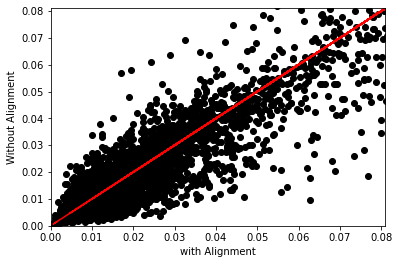

In [8]:
plt.scatter(merged.sigma_x,merged.sigma_y,c='k')
plt.plot(merged.sigma_x,merged.sigma_x,c='r')
plt.xlim([0,0.081])
plt.ylim([0,0.081])
plt.xlabel("with Alignment")
plt.ylabel("Without Alignment")

In [9]:
# import seaborn as sns
# # sns.kdeplot(merged.sigma_x)
# # plt.show()
# # sns.kdeplot(merged.sigma_y)

# # plt.hist(merged.sigma_x)
# # plt.show()
# # plt.hist(merged.sigma_y)

# # plt.xlim([-10,1000])
# # plt.ylim([-10,10])

In [10]:
# merged[["sigma_x","sigma_y"]].describe()

In [11]:
# ax = sns.boxplot(data=merged[["sigma_x","sigma_y"]], orient="h", palette="cool_r")

In [12]:
# print(merged[merged.sigma_x > merged.sigma_y].shape[0]/merged.shape[0],
#       merged[merged.sigma_x == merged.sigma_y].shape[0]/merged.shape[0],
#       merged[merged.sigma_x < merged.sigma_y].shape[0]/merged.shape[0])

In [13]:
print(merged[merged.sigma_x/(merged.NDP_x**0.5) < merged.sigma_y /(merged.NDP_y**0.5)].shape[0]/merged.shape[0],
      merged[merged.sigma_x/(merged.NDP_x**0.5) == merged.sigma_y/(merged.NDP_y**0.5)].shape[0]/merged.shape[0],
      merged[merged.sigma_x/(merged.NDP_x**0.5) > merged.sigma_y /(merged.NDP_y**0.5)].shape[0]/merged.shape[0])

0.7836822940373236 0.0312926718252162 0.18502503413746016


In [14]:
print(merged[merged.old_Rsquared_x >  merged.old_Rsquared_y].shape[0]/merged.shape[0],
      merged[merged.old_Rsquared_x == merged.old_Rsquared_y].shape[0]/merged.shape[0],
      merged[merged.old_Rsquared_x <  merged.old_Rsquared_y].shape[0]/merged.shape[0])


0.5568957669549386 0.0312926718252162 0.41181156121984525


In [15]:
print(merged[merged.old_pearson_x >  merged.old_pearson_y].shape[0]/merged.shape[0],
      merged[merged.old_pearson_x == merged.old_pearson_y].shape[0]/merged.shape[0],
      merged[merged.old_pearson_x <  merged.old_pearson_y].shape[0]/merged.shape[0])


0.44264906690942196 0.0312926718252162 0.5260582612653618
